In [1]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 13.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 32.9 MB/s eta 0:00:0000:0100:01
  Created wheel for peewee: filename=peewee-3.17.8-cp39-cp39-macosx_10_9_universal2.whl size=418842 sha256=fa9c28f038117073f0a58cad91b4b2dd2a428ec4e7a8d9307945ce36ebfaf3d9
  Stored in directory: /Users/shivamverma/Library/Caches/pip/wheels/06/b3/7f/ed42a7c83ad89f578928833f5789212c694a015b8bd6a407a1
Successfully built peewee

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/u

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestClassifier

/Users/shivamverma/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [5]:
stock = 'AAPL'
df = yf.download(stock, start='2018-01-01', end='2024-11-27')

[*********************100%***********************]  1 of 1 completed


In [6]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-01-02,40.524338,43.064999,43.075001,42.314999,42.540001,102223600
2018-01-03,40.517288,43.057499,43.637501,42.990002,43.132500,118071600
2018-01-04,40.705486,43.257500,43.367500,43.020000,43.134998,89738400
2018-01-05,41.168926,43.750000,43.842499,43.262501,43.360001,94640000
2018-01-08,41.016022,43.587502,43.902500,43.482498,43.587502,82271200
...,...,...,...,...,...,...
2024-11-20,229.000000,229.000000,229.929993,225.889999,228.059998,35169600
2024-11-21,228.520004,228.520004,230.160004,225.710007,228.880005,42108300


In [7]:
df = df[['Adj Close']]

In [8]:
df.index = pd.to_datetime(df.index)

In [9]:
result = adfuller(df['Adj Close'])

In [10]:
result[0]

-0.2222567740607617

In [11]:
result[1]

0.9358161461363582

In [12]:
np.var(df['Adj Close'])

/Users/shivamverma/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Ticker
AAPL    3358.670228
dtype: float64

(array([437., 124.,  85.,  62., 201., 268., 247., 191.,  22., 101.]),
 array([ 33.95254135,  54.17929802,  74.40605469,  94.63281136,
        114.85956802, 135.08632469, 155.31308136, 175.53983803,
        195.7665947 , 215.99335136, 236.22010803]),
 <BarContainer object of 10 artists>)

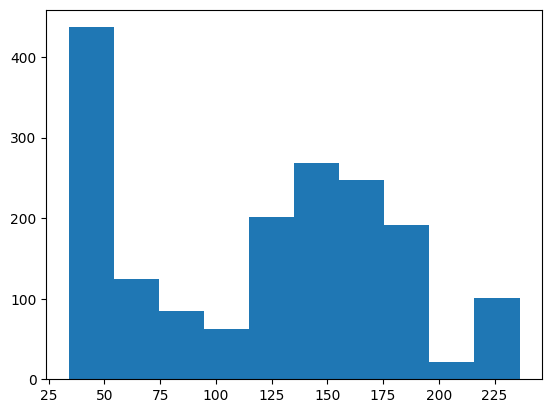

In [13]:
plt.hist(df['Adj Close'])

In [14]:
print(np.var(df['Adj Close']))
print(np.std(df['Adj Close']))
print(np.mean(df['Adj Close']))

Ticker
AAPL    3358.670228
dtype: float64
Ticker
AAPL    57.954035
dtype: float64
120.73701543116597


/Users/shivamverma/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [15]:
df['price_diff'] = df['Adj Close'].shift()

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_92167/3345605203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_diff'] = df['Adj Close'].shift()


In [16]:
df['price_diff'] = df['Adj Close'].shift()

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_92167/3345605203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_diff'] = df['Adj Close'].shift()


(array([437., 124.,  85.,  62., 201., 268., 247., 191.,  22., 101.]),
 array([ 33.95254135,  54.17929802,  74.40605469,  94.63281136,
        114.85956802, 135.08632469, 155.31308136, 175.53983803,
        195.7665947 , 215.99335136, 236.22010803]),
 <BarContainer object of 10 artists>)

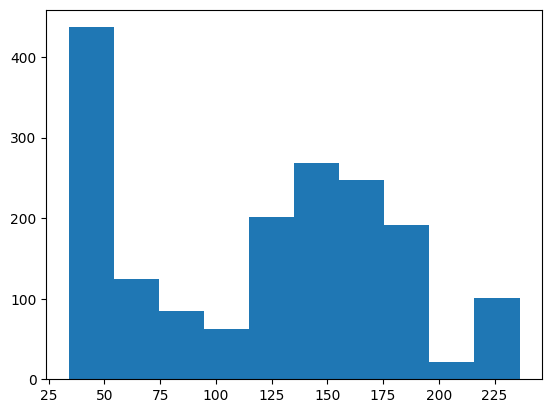

In [18]:
plt.hist(df['Adj Close'])

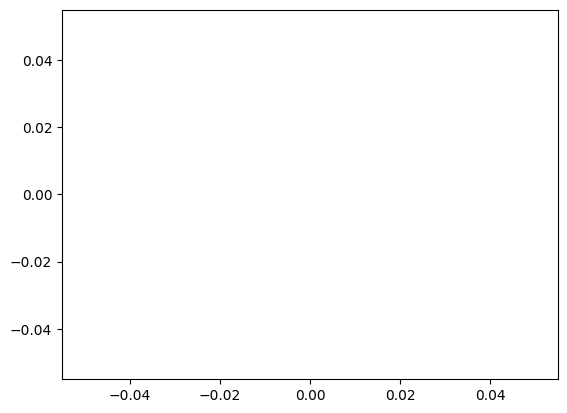

In [19]:
plt.scatter(df['price_diff'],df['Adj Close'])

In [20]:
df['price_diff'] = df['Adj Close'].shift()

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_92167/3345605203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_diff'] = df['Adj Close'].shift()


In [21]:
df['price_diff'] = df['Adj Close'].shift()

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_92167/3345605203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_diff'] = df['Adj Close'].shift()


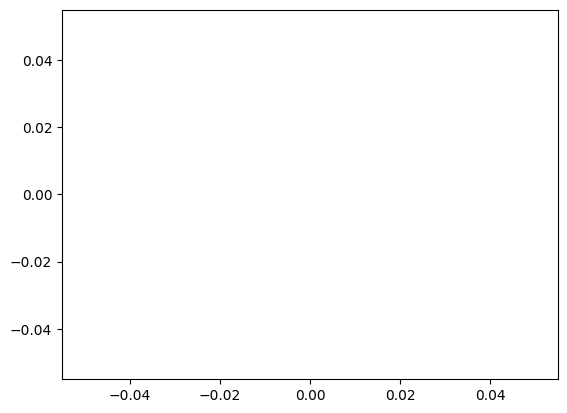

In [22]:
plt.scatter(df['price_diff'],df['Adj Close'])

In [23]:
df['t-2'] = df['Adj Close'].shift(2)

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_92167/531317907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t-2'] = df['Adj Close'].shift(2)


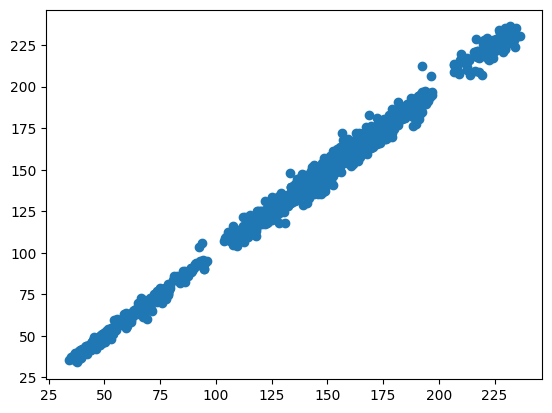

In [24]:
plt.scatter(df['t-2'], df['Adj Close'])

In [25]:
df['t-50'] = df['Adj Close'].shift(50)

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_92167/3545965860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t-50'] = df['Adj Close'].shift(50)


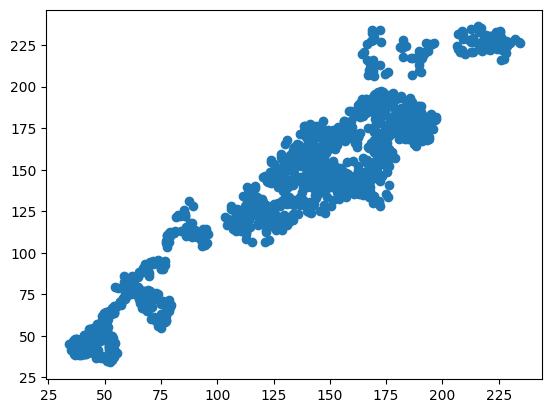

In [26]:
plt.scatter(df['t-50'], df['Adj Close'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

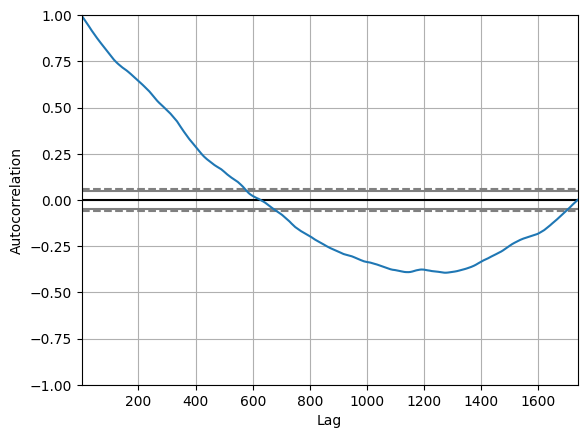

In [27]:
pd.plotting.autocorrelation_plot(df['Adj Close'])

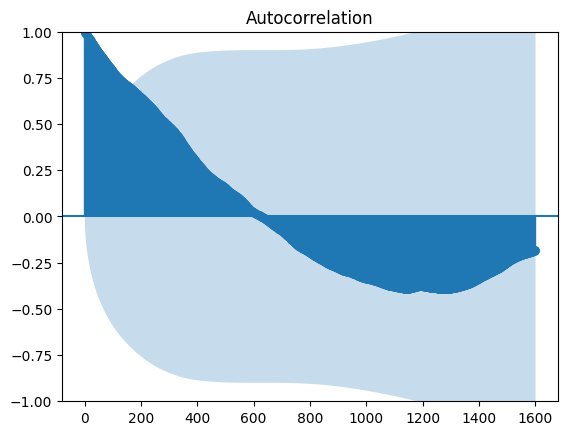

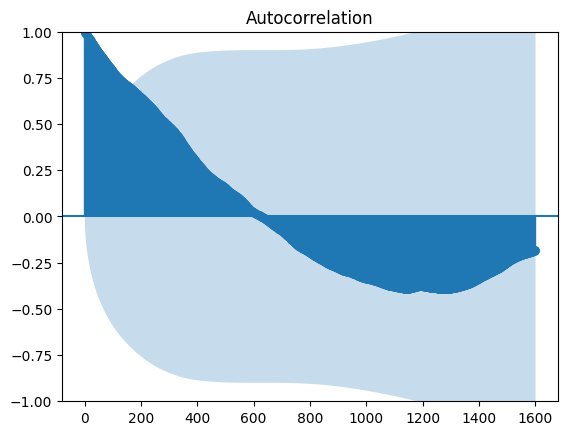

In [28]:
plot_acf(df['Adj Close'], lags=1600)

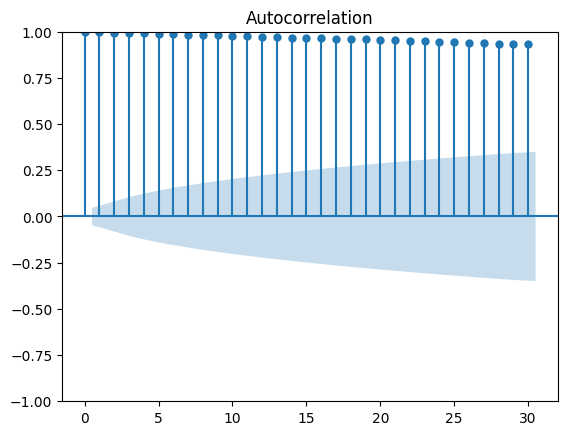

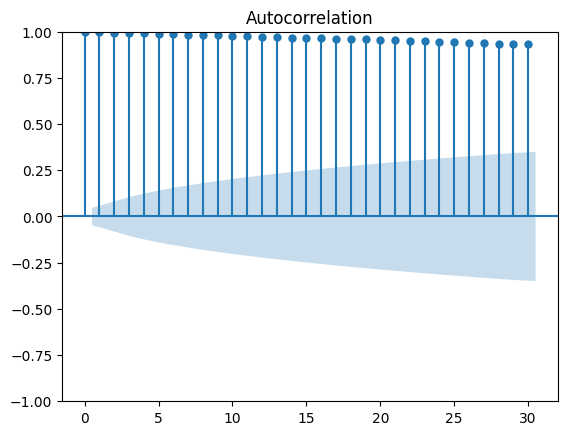

In [29]:
plot_acf(df['Adj Close'], lags=30)

In [30]:
model = ARIMA(df['Adj Close'], order=(1,1,1))

/Users/shivamverma/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/shivamverma/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/shivamverma/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [31]:
fit = model.fit()

/Users/shivamverma/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/shivamverma/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [32]:
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1738
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3904.040
Date:                Wed, 27 Nov 2024   AIC                           7814.080
Time:                        20:43:45   BIC                           7830.460
Sample:                             0   HQIC                          7820.137
                               - 1738                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5655      0.440      1.285      0.199      -0.297       1.428
ma.L1         -0.5883      0.434     -1.356      0.175      -1.439       0.262
sigma2         5.2450      0.108     48.549      0.0

In [33]:
forecast = fit.forecast(steps=30)

/Users/shivamverma/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/shivamverma/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [34]:
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')

In [35]:
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
forecast_series = pd.Series(forecast, index=forecast_index)

In [36]:
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')

In [37]:
forecast_df = pd.concat([pd.DataFrame(forecast_index), pd.DataFrame(forecast.reset_index())], axis=1)
forecast_df.drop('index', axis=1, inplace=True)
forecast_df.rename({0:'date'},axis=1, inplace=True)

In [38]:
forecast_df.set_index('date', inplace=True)
forecast_df

,predicted_mean
date,
2024-11-27,234.956963
2024-11-28,234.898698
2024-11-29,234.865749
2024-12-02,234.847117
2024-12-03,234.836580
2024-12-04,234.830622
2024-12-05,234.827253
2024-12-06,234.825348
2024-12-09,234.824270


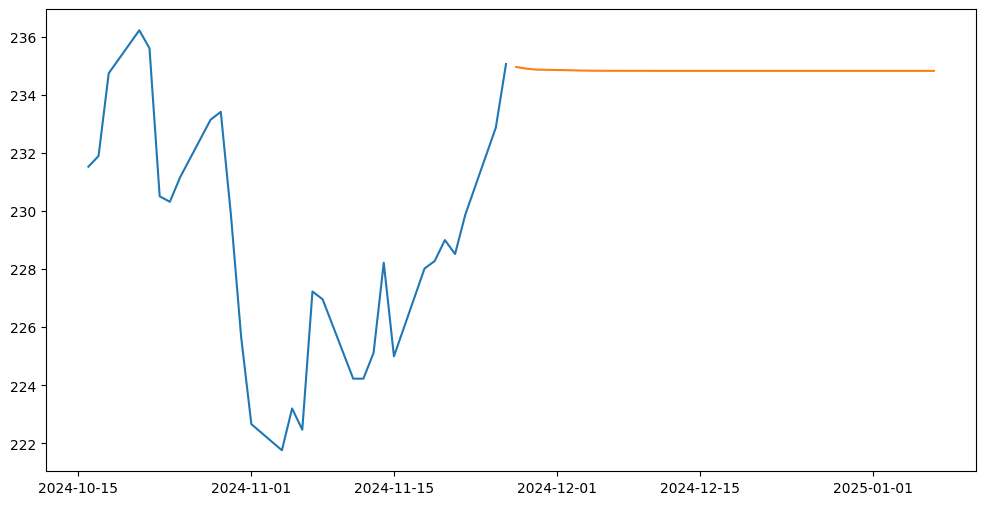

In [39]:
plt.figure(figsize=(12,6))
plt.plot(df['Adj Close'].iloc[-30:])
plt.plot(forecast_df)

In [40]:
df.rename({'price_diff':'t-1'}, inplace=True)

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_92167/3700163085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({'price_diff':'t-1'}, inplace=True)


In [41]:
df.rename({'price_diff':'t-1'}, axis=1,inplace=True)

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_92167/1087581616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({'price_diff':'t-1'}, axis=1,inplace=True)


In [42]:
df.drop('t-50', axis=1, inplace=True)

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_92167/1500505010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('t-50', axis=1, inplace=True)


In [43]:
df['t-3'] = df['Adj Close'].shift(3)

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_92167/253340229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t-3'] = df['Adj Close'].shift(3)


In [44]:
#train test split
train_size = int(0.8 * len(df))

In [45]:
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [46]:
X_train = train[['t-1', 't-2', 't-3']]
y_train = train['Adj Close']
X_test = test[['t-1', 't-2', 't-3']]
y_test = test['Adj Close']

In [47]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

/Users/shivamverma/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [48]:
y_pred = rf.predict(X_test)

In [49]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

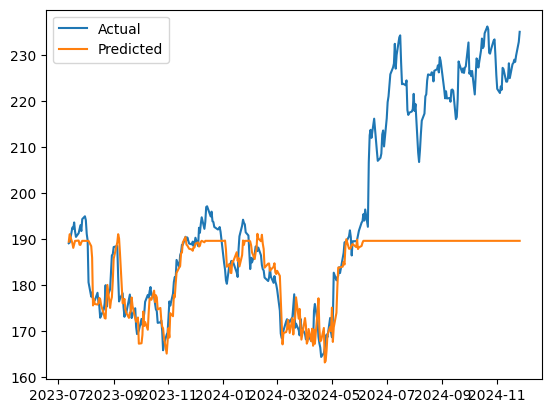

In [50]:
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, y_pred, label='Predicted')
plt.legend()

In [51]:
arima_forecast = fit.forecast(steps = len(y_test))

/Users/shivamverma/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/shivamverma/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [52]:
arima_rmse = np.sqrt(mean_squared_error(y_test, arima_forecast))

In [53]:
arima_rmse

44.641152635704444

In [54]:
rmse

20.443482405108526